# Comparación del Algoritmo Propuesto Clase VS Modificado

Al estudiar el algoritmo de programación dinámica presentado en clase, me percaté de que  aunque el algoritmo seleccionaba una combinación de objetos que consideraba optima según la capacidad disponible en la nave espacial y las utilidades de los productos, **no verificaba si queda espacio sobrante para añadir más objetos y aumentar la utilidad total**.

Este comportamiento puede llevar a soluciones subóptimas, ya que el algoritmo **se detiene una vez que llena la tabla `dp` sin explorar si aún puede añadir más objetos para aprovechar mejor la capacidad total de la mochila**.


## Ejemplo Ilustrativo

Para poder explicar de forma más clara lo que acabo de comentar. He considerado un  ejemplo más reducido, con menos variedad de objetos para transportar en la nave y una capacidad de carga más limitada $ W_{\text{carga}} = 100 $. En este caso, seleccioné únicamente los 5 primeros productos de la lista original:

**Datos del Problema**
- Capacidad de la mochila: 100 kg.
-Productos Disponibles:
  1. Producto 1: Peso = 12 kg, Utilidad = 4, Máx. Cantidad = 3.
  2. Producto 2: Peso = 7 kg, Utilidad = 2, Máx. Cantidad = 5.
  3. Producto 3: Peso = 11 kg, Utilidad = 3, Máx. Cantidad = 2.
  4. Producto 4: Peso = 8 kg, Utilidad = 5, Máx. Cantidad = 4.
  5. Producto 5: Peso = 20 kg, Utilidad = 7, Máx. Cantidad = 2.



A continuacón se evalúan las soluciones óptimas optenidas con los dos algoritmos....

## A-Propuesto Clase

In [ ]:
# Lista de productos con sus características
productos = [
    {'id': 1, 'peso': 12, 'utilidad': 4, 'max_cantidad': 3},
    {'id': 2, 'peso': 7, 'utilidad': 2, 'max_cantidad': 5},
    {'id': 3, 'peso': 11, 'utilidad': 3, 'max_cantidad': 2},
    {'id': 4, 'peso': 8, 'utilidad': 5, 'max_cantidad': 4},
    {'id': 5, 'peso': 20, 'utilidad': 7, 'max_cantidad': 2},

]

# Pesos de los componentes
W_transbordador = 1000  # kg
W_combustible = 500     # kg

# Capacidad máxima de peso
capacidad_peso = 100 # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []  # Para almacenar las cantidades

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)  # Guardar la cantidad
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación Dinámica
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]
    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i
    # Después de actualizar dp, reconstruimos la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    # Reconstruir la solución actual
    w_temp = peso_utilizado
    productos_seleccionados_iteracion = {}
    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]
    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad
    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstruir la solución final
max_utilidad = max(dp)
peso_total_utilizado = dp.index(max_utilidad)
w = peso_total_utilizado
productos_seleccionados = {}

while w > 0 and item[w] != -1:
    idx = item[w]
    producto_id = indices_productos[idx]
    cantidad_utilizada = cantidades_subproductos[idx]
    if producto_id in productos_seleccionados:
        productos_seleccionados[producto_id] += cantidad_utilizada
    else:
        productos_seleccionados[producto_id] = cantidad_utilizada
    w = pre[w]

# Ajustar las cantidades para que no excedan las máximas permitidas
for producto_id in productos_seleccionados:
    max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == producto_id)
    if productos_seleccionados[producto_id] > max_cantidad:
        productos_seleccionados[producto_id] = max_cantidad

# Calcular el peso total de los productos seleccionados
peso_total = sum(productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid) for pid in productos_seleccionados)

# Calcular la utilidad total
utilidad_total = sum(productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid) for pid in productos_seleccionados)

# Calcular W_total y ISR
W_carga = peso_total
W_total = W_transbordador + W_combustible + W_carga
ISR_obtenido = W_total / W_carga if W_carga != 0 else float('inf')

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado (W_carga): {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")
print(f"Peso total del sistema (W_total): {W_total} kg")
print(f"ISR obtenido (W_total / W_carga): {ISR_obtenido:.2f}")

Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		4		12 kg		{1: 1}
2		12		36 kg		{1: 3}
3		14		43 kg		{2: 1, 1: 3}
4		18		57 kg		{2: 3, 1: 3}
5		22		71 kg		{2: 5, 1: 3}
6		25		82 kg		{3: 1, 2: 5, 1: 3}
7		28		93 kg		{3: 2, 2: 5, 1: 3}
8		31		94 kg		{4: 4}
9		38		99 kg		{4: 4}
10		41		100 kg		{4: 4}
11		42		99 kg		{5: 2, 4: 4}
12		42		96 kg		{5: 2, 4: 4}

Distribución óptima de productos:
Producto 4: Cantidad = 4, Peso Total = 32 kg, Utilidad Total = 20
Producto 5: Cantidad = 2, Peso Total = 40 kg, Utilidad Total = 14

Peso total utilizado (W_carga): 72 kg
Utilidad total: 34
Peso total del sistema (W_total): 1572 kg
ISR obtenido (W_total / W_carga): 21.83


## A-Modificado

In [ ]:
# Lista de productos con sus características
productos = [
  {'id': 1, 'peso': 12, 'utilidad': 4, 'max_cantidad': 3},
    {'id': 2, 'peso': 7, 'utilidad': 2, 'max_cantidad': 5},
    {'id': 3, 'peso': 11, 'utilidad': 3, 'max_cantidad': 2},
    {'id': 4, 'peso': 8, 'utilidad': 5, 'max_cantidad': 4},
    {'id': 5, 'peso': 20, 'utilidad': 7, 'max_cantidad': 2},

]
# Capacidad máxima de peso
capacidad_peso = 100  # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación dinámica con relleno del espacio restante
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
productos_seleccionados_iteracion = {}

for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]

    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i

    # Después de actualizar `dp`, reconstruir la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    w_temp = peso_utilizado
    productos_seleccionados_iteracion.clear()

    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]

    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad

    #PASO AÑADIDO : llenar el espacio restante si aún quedasen objetos
    peso_total_actual = sum(
        productos_seleccionados_iteracion.get(pid, 0) * next(p['peso'] for p in productos if p['id'] == pid)
        for pid in productos_seleccionados_iteracion
    )

    for producto in productos:
        while (
            peso_total_actual + producto['peso'] <= capacidad_peso
            and productos_seleccionados_iteracion.get(producto['id'], 0) < producto['max_cantidad']
        ):
            if producto['id'] in productos_seleccionados_iteracion:
                productos_seleccionados_iteracion[producto['id']] += 1
            else:
                productos_seleccionados_iteracion[producto['id']] = 1
            peso_total_actual += producto['peso']

    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstrucción de la solución final utilizando la última iteración
productos_seleccionados = productos_seleccionados_iteracion.copy()

# Calcular la utilidad total y peso total
peso_total = sum(
    productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)
utilidad_total = sum(
    productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado: {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")

Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		4		12 kg		{1: 3, 2: 5, 3: 2}
2		12		36 kg		{1: 3, 2: 5, 3: 2}
3		14		43 kg		{2: 5, 1: 3, 3: 2}
4		18		57 kg		{2: 5, 1: 3, 3: 2}
5		22		71 kg		{2: 5, 1: 3, 3: 2}
6		25		82 kg		{3: 2, 2: 5, 1: 3}
7		28		93 kg		{3: 2, 2: 5, 1: 3}
8		31		94 kg		{4: 4, 1: 3, 2: 4}
9		38		99 kg		{4: 4, 1: 3, 2: 4}
10		41		100 kg		{4: 4, 1: 3, 2: 4}
11		42		99 kg		{5: 2, 4: 4, 1: 2}
12		42		96 kg		{5: 2, 4: 4, 1: 2}

Distribución óptima de productos:
Producto 1: Cantidad = 2, Peso Total = 24 kg, Utilidad Total = 8
Producto 4: Cantidad = 4, Peso Total = 32 kg, Utilidad Total = 20
Producto 5: Cantidad = 2, Peso Total = 40 kg, Utilidad Total = 14

Peso total utilizado: 96 kg
Utilidad total: 42


## Comparación de Resultados

A continuación, he recogido en una tabla comparativa los resultados obtenidos con el algoritmo propuesto en clase y los resultados con el algoritmo modificado .Este añade un paso adicional para rellenar el espacio sobrante en la mochila con los objetos aún no se han utilizado pero sin exceder la capidad total de carga.







#### Tabla comparativa Resultados




| **Criterio**                  | **Algoritmo de Clase**                                | **Algoritmo Modificado**                        |
|-------------------------------|-----------------------------------------------------|------------------------------------------------|
| **Productos Seleccionados**   | Producto 4: 4 unidades                              | Producto 4: 4 unidades                         |
|                               | Producto 5: 2 unidades                              | Producto 5: 2 unidades                         |
|                               | *Espacio sobrante no utilizado*                    | Producto 1: 2 unidades (relleno)               |
| **Peso Total Utilizado (kg)** | 72 kg                                              | 96 kg                                          |
| **Utilidad Total**            | 34                                                 | 42                                             |
| **Espacio Sobrante (kg)**     | 28                                                 | 4                                              |



### Análisis

1. **Algoritmo de Clase**:
   - Solo considera las combinaciones generadas en la tabla `dp` y selecciona una solución que no maximiza el uso de la capacidad de la mochila.
   - Deja un un vacion en la capidad de carga de la nave de 28kg  sin intentar rellenarlo, lo que lleva a una menor utilidad total.

2. **Algoritmo Modificado**:
   - Añade un paso para verificar el espacio sobrante tras seleccionar la solución inicial.
   - Busca rellenar este espacio con productos adicionales respetando las restricciones, logrando una mayor utilidad total y un mejor aprovechamiento de la capacidad de la mochila.

# Optimización de la utilidad en la Nave Espacial


Este algoritmo utiliza **programación dinámica** para maximizar la utilidad total de los productos seleccionados dentro de una capacidad de peso dada. Además, incorpora un paso adicional para rellenar el espacio sobrante, asegurando que la capacidad de la mochila se utiliza al máximo posible.



## ¿Cómo Funciona el Algoritmo?

### 1. **Representación Binaria de las Cantidades**
Cada producto tiene un peso, una utilidad y una cantidad máxima permitida. Para manejar estas restricciones, el algoritmo utiliza una representación binaria para descomponer las cantidades máximas en subproductos. Por ejemplo:
- Un producto con una cantidad máxima de 5 se descompone como: $(1, 2, 2)$ ,es decir, $1+2+2=5$).
- Esto permite manejar cada subproducto como un objeto independiente.

Los subproductos se almacenan en listas:
- `pesos`: contiene el peso de cada subproducto.
- `utilidades`: contiene la utilidad de cada subproducto.
- `indices_productos`: almacena el ID del producto original asociado a cada subproducto.
- `cantidades_subproductos`: almacena la cantidad del subproducto representado.



### 2. **Programación Dinámica**
La programación dinámica se utiliza para construir una tabla `dp`, donde:
- `dp[w]` representa la utilidad máxima alcanzable con un peso total \(w\).
- `pre[w]` guarda el estado anterior de la tabla para reconstruir la solución.
- `item[w]` guarda el índice del subproducto que contribuye a la utilidad máxima en \(w\).

#### Proceso:
1. Se itera sobre cada subproducto.
2. Para cada capacidad posible w  desde la máxima 500  hasta el peso del subproducto, se calcula:
   $$
   dp[w] = \max(dp[w], dp[w - \text{peso}] + \text{utilidad})
   $$
3. Se actualizan las listas `pre` e `item` para reconstruir la solución.



### 3. **Reconstrucción de la Solución**
Después de completar la tabla `dp`, se reconstruye la solución seleccionando los subproductos que contribuyen a la utilidad máxima:
1. Se parte del peso correspondiente a la máxima utilidad en `dp`.
2. Se rastrean los subproductos seleccionados usando las listas `pre` e `item`.



### 4. **Paso Adicional: Relleno del Espacio Sobrante**
El algoritmo añade un paso adicional para aprovechar el espacio sobrante en la mochila:
1. Calcula el peso total actual de los productos seleccionados.
2. Itera sobre los productos disponibles y verifica si alguno puede ser añadido sin superar la capacidad total.
3. Se añaden productos hasta que se llena el espacio o se alcanzan las restricciones máximas de cantidad.


### 5. **Resultados Finales**
Se calculan:
- **Peso Total Utilizado**: suma de los pesos de los productos seleccionados.
- **Utilidad Total**: suma de las utilidades de los productos seleccionados.



## Optimización Por Utilidad

In [ ]:
# Lista de productos con sus características
productos = [
    {'id': 1, 'peso': 12, 'utilidad': 4, 'max_cantidad': 3},
    {'id': 2, 'peso': 7, 'utilidad': 2, 'max_cantidad': 5},
    {'id': 3, 'peso': 11, 'utilidad': 3, 'max_cantidad': 2},
    {'id': 4, 'peso': 8, 'utilidad': 5, 'max_cantidad': 4},
    {'id': 5, 'peso': 20, 'utilidad': 7, 'max_cantidad': 2},
    {'id': 6, 'peso': 14, 'utilidad': 6, 'max_cantidad': 1},
    {'id': 7, 'peso': 6, 'utilidad': 2, 'max_cantidad': 6},
    {'id': 8, 'peso': 13, 'utilidad': 5, 'max_cantidad': 2},
    {'id': 9, 'peso': 15, 'utilidad': 8, 'max_cantidad': 1},
    {'id': 10, 'peso': 10, 'utilidad': 4, 'max_cantidad': 3},
    {'id': 11, 'peso': 10, 'utilidad': 1, 'max_cantidad': 7},
    {'id': 12, 'peso': 16, 'utilidad': 9, 'max_cantidad': 1},
    {'id': 13, 'peso': 8, 'utilidad': 3, 'max_cantidad': 4},
    {'id': 14, 'peso': 7, 'utilidad': 2, 'max_cantidad': 5},
    {'id': 15, 'peso': 9, 'utilidad': 5, 'max_cantidad': 3},
    {'id': 16, 'peso': 6, 'utilidad': 2, 'max_cantidad': 6},
    {'id': 17, 'peso': 12, 'utilidad': 6, 'max_cantidad': 2},
    {'id': 18, 'peso': 11, 'utilidad': 5, 'max_cantidad': 2},
    {'id': 19, 'peso': 14, 'utilidad': 7, 'max_cantidad': 1},
    {'id': 20, 'peso': 10, 'utilidad': 4, 'max_cantidad': 3},
]

# Pesos de los componentes
W_transbordador = 1000  # kg
W_combustible = 500     # kg

# Capacidad máxima de peso
capacidad_peso = 500  # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación dinámica con relleno del espacio restante
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
productos_seleccionados_iteracion = {}

for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]

    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i

    # Después de actualizar `dp`, reconstruir la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    w_temp = peso_utilizado
    productos_seleccionados_iteracion.clear()

    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]

    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad

    # Paso adicional: llenar el espacio restante
    peso_total_actual = sum(
        productos_seleccionados_iteracion.get(pid, 0) * next(p['peso'] for p in productos if p['id'] == pid)
        for pid in productos_seleccionados_iteracion
    )

    for producto in productos:
        while (
            peso_total_actual + producto['peso'] <= capacidad_peso
            and productos_seleccionados_iteracion.get(producto['id'], 0) < producto['max_cantidad']
        ):
            if producto['id'] in productos_seleccionados_iteracion:
                productos_seleccionados_iteracion[producto['id']] += 1
            else:
                productos_seleccionados_iteracion[producto['id']] = 1
            peso_total_actual += producto['peso']

    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstrucción de la solución final utilizando la última iteración
productos_seleccionados = productos_seleccionados_iteracion.copy()

# Calcular la utilidad total y peso total
peso_total = sum(
    productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)
utilidad_total = sum(
    productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)

# Calcular W_total y ISR
W_carga = peso_total
W_total = W_transbordador + W_combustible + W_carga
ISR_obtenido = W_total / W_carga if W_carga != 0 else float('inf')

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado (W_carga): {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")
print(f"Peso total del sistema (W_total): {W_total} kg")
print(f"ISR obtenido (W_total / W_carga): {ISR_obtenido:.2f}")

Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		4		12 kg		{1: 3, 2: 5, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
2		12		36 kg		{1: 3, 2: 5, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
3		14		43 kg		{2: 5, 1: 3, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
4		18		57 kg		{2: 5, 1: 3, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
5		22		71 kg		{2: 5, 1: 3, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
6		25		82 kg		{3: 2, 2: 5, 1: 3, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
7		28		93 kg		{3: 2, 2: 5, 1: 3, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
8		33		101 kg		{4: 4, 1: 3, 2: 5, 3: 2, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 

### Resultados Optimización x Utilidad

| Producto | Cantidad | Peso Total (kg) | Utilidad Total |
|----------|----------|-----------------|----------------|
| 1        | 3        | 36              | 12             |
| 2        | 5        | 35              | 10             |
| 3        | 2        | 22              | 6              |
| 4        | 4        | 32              | 20             |
| 5        | 2        | 40              | 14             |
| 6        | 1        | 14              | 6              |
| 7        | 6        | 36              | 12             |
| 8        | 2        | 26              | 10             |
| 9        | 1        | 15              | 8              |
| 10       | 3        | 30              | 12             |
| 11       | 7        | 70              | 7              |
| 12       | 1        | 16              | 9              |
| 13       | 1        | 8               | 3              |
| 15       | 3        | 27              | 15             |
| 17       | 2        | 24              | 12             |
| 18       | 2        | 22              | 10             |
| 19       | 1        | 14              | 7              |
| 20       | 3        | 30              | 12             |

**Peso total utilizado:** 497 kg  
**Utilidad total:** 185

**Cantidad de objetos:** 49

## Optimización x Cantidad de Objetos

In [ ]:
# Lista de productos con sus características
productos = [
    {'id': 1, 'peso': 12, 'utilidad': 1, 'max_cantidad': 3},
    {'id': 2, 'peso': 7, 'utilidad': 1, 'max_cantidad': 5},
    {'id': 3, 'peso': 11, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 4, 'peso': 8, 'utilidad': 1, 'max_cantidad': 4},
    {'id': 5, 'peso': 20, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 6, 'peso': 14, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 7, 'peso': 6, 'utilidad': 1, 'max_cantidad': 6},
    {'id': 8, 'peso': 13, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 9, 'peso': 15, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 10, 'peso': 10, 'utilidad': 1, 'max_cantidad': 3},
    {'id': 11, 'peso': 10, 'utilidad': 1, 'max_cantidad': 7},
    {'id': 12, 'peso': 16, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 13, 'peso': 8, 'utilidad': 1, 'max_cantidad': 4},
    {'id': 14, 'peso': 7, 'utilidad': 1, 'max_cantidad': 5},
    {'id': 15, 'peso': 9, 'utilidad': 1, 'max_cantidad': 3},
    {'id': 16, 'peso': 6, 'utilidad': 1, 'max_cantidad': 6},
    {'id': 17, 'peso': 12, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 18, 'peso': 11, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 19, 'peso': 14, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 20, 'peso': 10, 'utilidad': 1, 'max_cantidad': 3},
]


# Pesos de los componentes
W_transbordador = 1000  # kg
W_combustible = 500     # kg

# Capacidad máxima de peso
capacidad_peso = 500  # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación dinámica con relleno del espacio restante
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
productos_seleccionados_iteracion = {}

for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]

    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i

    # Después de actualizar `dp`, reconstruir la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    w_temp = peso_utilizado
    productos_seleccionados_iteracion.clear()

    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]

    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad

    # Paso adicional: llenar el espacio restante
    peso_total_actual = sum(
        productos_seleccionados_iteracion.get(pid, 0) * next(p['peso'] for p in productos if p['id'] == pid)
        for pid in productos_seleccionados_iteracion
    )

    for producto in productos:
        while (
            peso_total_actual + producto['peso'] <= capacidad_peso
            and productos_seleccionados_iteracion.get(producto['id'], 0) < producto['max_cantidad']
        ):
            if producto['id'] in productos_seleccionados_iteracion:
                productos_seleccionados_iteracion[producto['id']] += 1
            else:
                productos_seleccionados_iteracion[producto['id']] = 1
            peso_total_actual += producto['peso']

    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstrucción de la solución final utilizando la última iteración
productos_seleccionados = productos_seleccionados_iteracion.copy()

# Calcular la utilidad total y peso total
peso_total = sum(
    productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)
utilidad_total = sum(
    productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)

# Calcular W_total y ISR
W_carga = peso_total
W_total = W_transbordador + W_combustible + W_carga
ISR_obtenido = W_total / W_carga if W_carga != 0 else float('inf')

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado (W_carga): {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")
print(f"Peso total del sistema (W_total): {W_total} kg")
print(f"ISR obtenido (W_total / W_carga): {ISR_obtenido:.2f}")

Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		1		12 kg		{1: 3, 2: 5, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
2		3		36 kg		{1: 3, 2: 5, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
3		4		43 kg		{2: 5, 1: 3, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
4		6		57 kg		{2: 5, 1: 3, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
5		8		71 kg		{2: 5, 1: 3, 3: 2, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
6		9		82 kg		{3: 2, 2: 5, 1: 3, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
7		10		93 kg		{3: 2, 2: 5, 1: 3, 4: 4, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3, 16: 5}
8		11		101 kg		{4: 4, 3: 2, 2: 5, 1: 3, 5: 2, 6: 1, 7: 6, 8: 2, 9: 1, 10: 3, 11: 7, 12: 1, 13: 4, 14: 5, 15: 3

### Resultados Optimización X Cantidad de Objetos

| **Producto**  | **Cantidad** | **Peso Total (kg)** | **Utilidad Total** |
|---------------|--------------|---------------------|--------------------|
| Producto 1    | 3            | 36                  | 12                 |
| Producto 2    | 5            | 35                  | 10                 |
| Producto 3    | 2            | 22                  | 6                  |
| Producto 4    | 4            | 32                  | 20                 |
| Producto 5    | 2            | 40                  | 14                 |
| Producto 6    | 1            | 14                  | 6                  |
| Producto 7    | 6            | 36                  | 12                 |
| Producto 8    | 2            | 26                  | 10                 |
| Producto 9    | 1            | 15                  | 8                  |
| Producto 10   | 3            | 30                  | 12                 |
| Producto 11   | 7            | 70                  | 7                  |
| Producto 12   | 1            | 16                  | 9                  |
| Producto 14   | 2            | 14                  | 4                  |
| Producto 16   | 6            | 36                  | 12                 |
| Producto 17   | 2            | 24                  | 12                 |
| Producto 18   | 2            | 22                  | 10                 |
| Producto 20   | 3            | 30                  | 12                 |


**Peso total utilizado**: 498 kg

**Utilidad total**: 176

**Cantidad de objetos**:52

## Aplicación Algoritmo Greedy -Optimización Cantidad Objetos Nave Espacial

In [ ]:
# Productos y parámetros
productos = [
    {'id': 1, 'peso': 12, 'utilidad': 1, 'max_cantidad': 3},
    {'id': 2, 'peso': 7, 'utilidad': 1, 'max_cantidad': 5},
    {'id': 3, 'peso': 11, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 4, 'peso': 8, 'utilidad': 1, 'max_cantidad': 4},
    {'id': 5, 'peso': 20, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 6, 'peso': 14, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 7, 'peso': 6, 'utilidad': 1, 'max_cantidad': 6},
    {'id': 8, 'peso': 13, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 9, 'peso': 15, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 10, 'peso': 10, 'utilidad': 1, 'max_cantidad': 3},
    {'id': 11, 'peso': 10, 'utilidad': 1, 'max_cantidad': 7},
    {'id': 12, 'peso': 16, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 13, 'peso': 8, 'utilidad': 1, 'max_cantidad': 4},
    {'id': 14, 'peso': 7, 'utilidad': 1, 'max_cantidad': 5},
    {'id': 15, 'peso': 9, 'utilidad': 1, 'max_cantidad': 3},
    {'id': 16, 'peso': 6, 'utilidad': 1, 'max_cantidad': 6},
    {'id': 17, 'peso': 12, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 18, 'peso': 11, 'utilidad': 1, 'max_cantidad': 2},
    {'id': 19, 'peso': 14, 'utilidad': 1, 'max_cantidad': 1},
    {'id': 20, 'peso': 10, 'utilidad': 1, 'max_cantidad': 3},
]

capacidad_peso = 500  # kg

# Ordenar los productos por peso ascendente
productos_ordenados = sorted(productos, key=lambda x: x['peso'])

# Algoritmo greedy
capacidad_restante = capacidad_peso
productos_seleccionados = {}

for producto in productos_ordenados:
    peso_objeto = producto['peso']
    max_cantidad = producto['max_cantidad']
    cantidad = min(max_cantidad, capacidad_restante // peso_objeto)
    if cantidad > 0:
        productos_seleccionados[producto['id']] = cantidad
        capacidad_restante -= cantidad * peso_objeto

# Calcular resultados
peso_total = sum(productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
                 for pid in productos_seleccionados)
cantidad_total = sum(productos_seleccionados.values())

# Mostrar resultados
print("Resultados del algoritmo greedy:")
print(f"Peso total utilizado: {peso_total} kg")
print(f"Cantidad total de objetos seleccionados: {cantidad_total}")
print("\nProductos seleccionados:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg")

Resultados del algoritmo greedy:
Peso total utilizado: 493 kg
Cantidad total de objetos seleccionados: 57

Productos seleccionados:
Producto 1: Cantidad = 3, Peso Total = 36 kg
Producto 2: Cantidad = 5, Peso Total = 35 kg
Producto 3: Cantidad = 2, Peso Total = 22 kg
Producto 4: Cantidad = 4, Peso Total = 32 kg
Producto 7: Cantidad = 6, Peso Total = 36 kg
Producto 8: Cantidad = 2, Peso Total = 26 kg
Producto 10: Cantidad = 3, Peso Total = 30 kg
Producto 11: Cantidad = 7, Peso Total = 70 kg
Producto 13: Cantidad = 4, Peso Total = 32 kg
Producto 14: Cantidad = 5, Peso Total = 35 kg
Producto 15: Cantidad = 3, Peso Total = 27 kg
Producto 16: Cantidad = 6, Peso Total = 36 kg
Producto 17: Cantidad = 2, Peso Total = 24 kg
Producto 18: Cantidad = 2, Peso Total = 22 kg
Producto 20: Cantidad = 3, Peso Total = 30 kg


### Resultados Algoritmo Greedy

| **Producto** | **Cantidad** | **Peso Total (kg)** |
|--------------|--------------|----------------------|
| Producto 1   | 3            | 36                   |
| Producto 2   | 5            | 35                   |
| Producto 3   | 2            | 22                   |
| Producto 4   | 4            | 32                   |
| Producto 7   | 6            | 36                   |
| Producto 8   | 2            | 26                   |
| Producto 10  | 3            | 30                   |
| Producto 11  | 7            | 70                   |
| Producto 13  | 4            | 32                   |
| Producto 14  | 5            | 35                   |
| Producto 15  | 3            | 27                   |
| Producto 16  | 6            | 36                   |
| Producto 17  | 2            | 24                   |
| Producto 18  | 2            | 22                   |
| Producto 20  | 3            | 30                   |

**Peso total utilizado:** 493 kg

**Cantidad total de objetos seleccionados:** 57

## Gráficos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Paleta de colores
colores = {
    'azul_marino': '#2c3e50',
    'azul_claro': '#85c1e9'
}

###Peso y Utilidad Total por Modelo

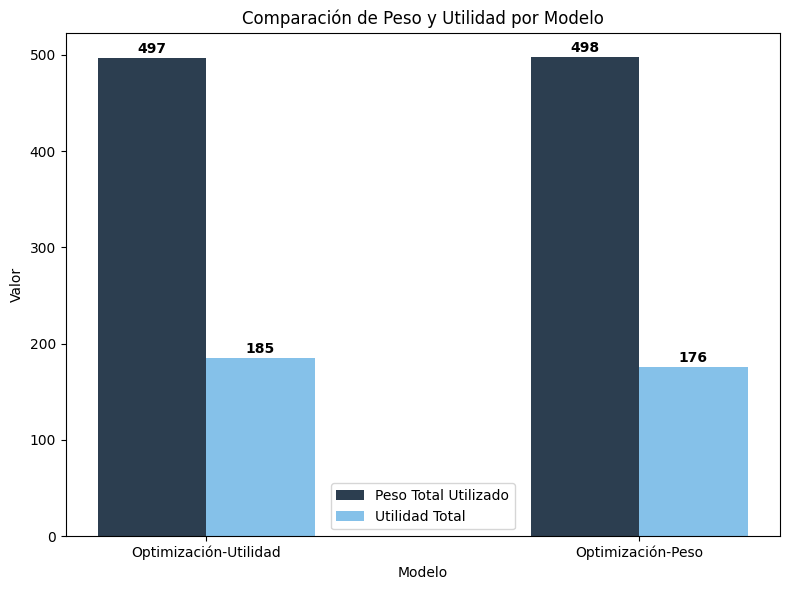

In [ ]:
# Datos para los modelos
modelos = ['Optimización-Utilidad', 'Optimización-Peso']
peso_total = [497, 498]
utilidad_total = [185, 176]

x = np.arange(len(modelos))
bar_width = 0.25


fig, ax = plt.subplots(figsize=(8, 6))


bar1 = ax.bar(x - bar_width / 2, peso_total, bar_width, label='Peso Total Utilizado', color=colores['azul_marino'])
bar2 = ax.bar(x + bar_width / 2, utilidad_total, bar_width, label='Utilidad Total', color=colores['azul_claro'])

# Etiquetas y título
ax.set_xlabel('Modelo')
ax.set_ylabel('Valor')
ax.set_title('Comparación de Peso y Utilidad por Modelo')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

# Valores de peso encima de las barras
for i, v in enumerate(peso_total):
    ax.text(i - bar_width / 2, v + 2, str(v), ha='center', va='bottom', color='black', fontweight='bold')

# Valores de utilidad encima de las barras
for i, v in enumerate(utilidad_total):
    ax.text(i + bar_width / 2, v + 2, str(v), ha='center', va='bottom', color='black', fontweight='bold')


plt.tight_layout()
plt.show()

### Distribución de Cantidad Objetos por Producto en Cada Modelo

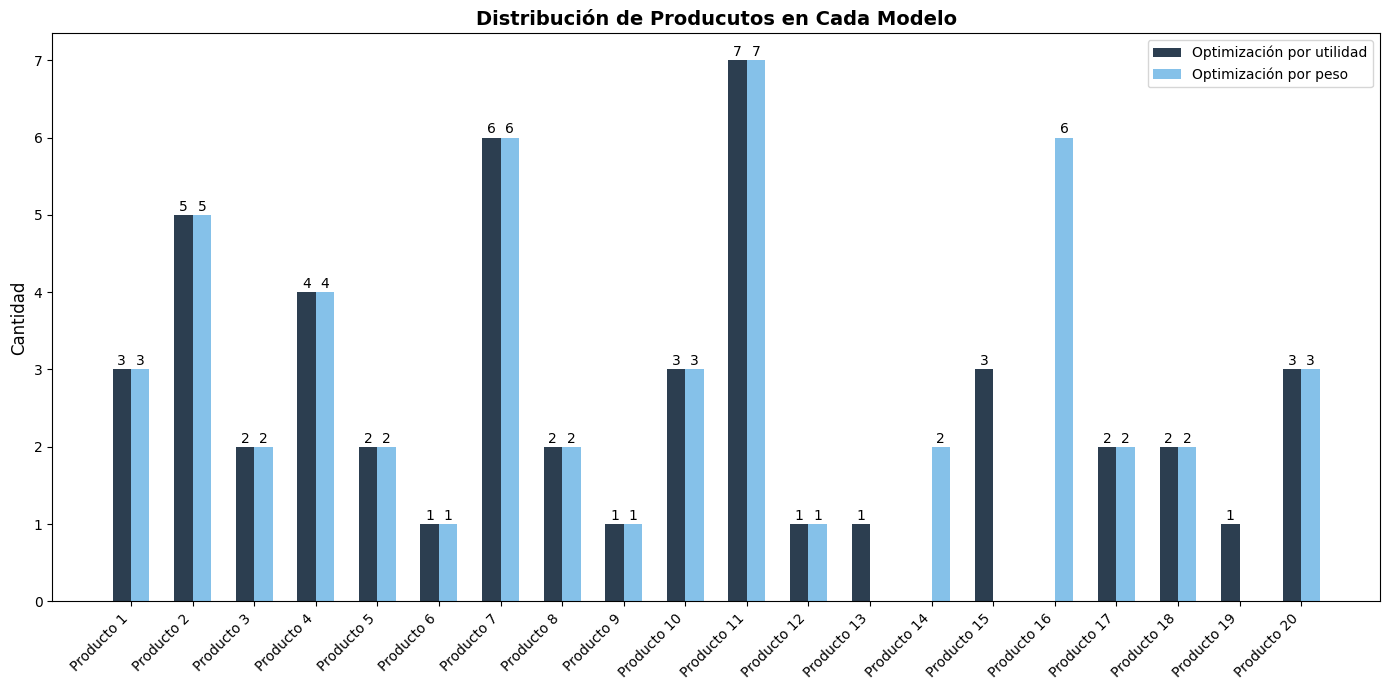

In [ ]:
# Datos
productos = [
    "Producto 1", "Producto 2", "Producto 3", "Producto 4", "Producto 5",
    "Producto 6", "Producto 7", "Producto 8", "Producto 9", "Producto 10",
    "Producto 11", "Producto 12", "Producto 13", "Producto 14", "Producto 15",
    "Producto 16", "Producto 17", "Producto 18", "Producto 19", "Producto 20"
]
cantidades_utilidad = [3, 5, 2, 4, 2, 1, 6, 2, 1, 3, 7, 1, 1, 0, 3, 0, 2, 2, 1, 3]
cantidades_peso = [3, 5, 2, 4, 2, 1, 6, 2, 1, 3, 7, 1, 0, 2, 0, 6, 2, 2, 0, 3]


x = np.arange(len(productos))
width = 0.3


fig, ax = plt.subplots(figsize=(14, 7))

# Barras para la cantidad en optimización por utilidad
barras_utilidad = ax.bar(x - width/2, cantidades_utilidad, width, label='Optimización por utilidad', color=colores['azul_marino'])

# Barras para la cantidad en optimización por peso
barras_peso = ax.bar(x + width/2, cantidades_peso, width, label='Optimización por peso', color=colores['azul_claro'])

# Etiquetas y título
ax.set_title("Distribución de Producutos en Cada Modelo", fontsize=14, weight='bold')
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(productos, rotation=45, ha='right', fontsize=10)
ax.legend()

# Valores encima de las barras
for barra in barras_utilidad:
    altura = barra.get_height()
    if altura > 0:
        ax.annotate(f'{int(altura)}', xy=(barra.get_x() + barra.get_width()/2, altura),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

for barra in barras_peso:
    altura = barra.get_height()
    if altura > 0:
        ax.annotate(f'{int(altura)}', xy=(barra.get_x() + barra.get_width()/2, altura),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)


plt.tight_layout()
plt.show()

### Cantidad de Productos por Modelo

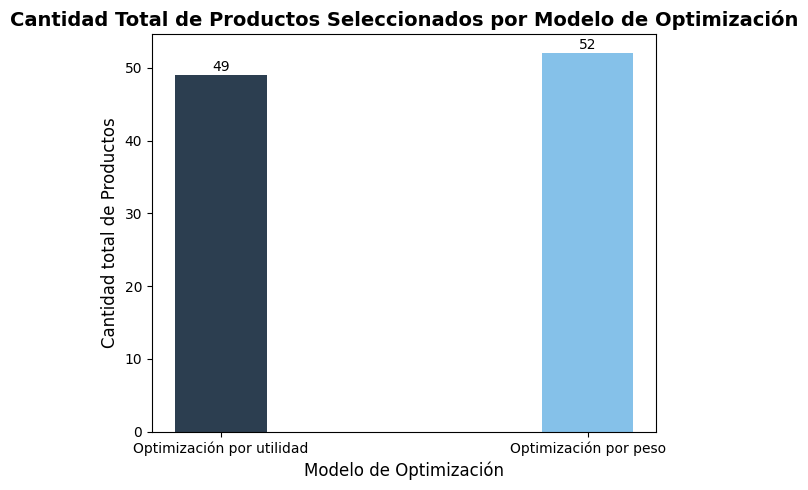

In [ ]:
modelos = ["Optimización por utilidad", "Optimización por peso"]
cantidades_totales = [49, 52]

# Crear el gráfico
x = np.arange(len(modelos))
width = 0.25

fig, ax = plt.subplots(figsize=(6, 5))


barras = ax.bar(x, cantidades_totales, width, color=[colores['azul_marino'], colores['azul_claro']])

# Etiquetas y título
ax.set_title("Cantidad Total de Productos Seleccionados por Modelo de Optimización", fontsize=14, weight='bold')
ax.set_xlabel("Modelo de Optimización", fontsize=12)
ax.set_ylabel("Cantidad total de Productos", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(modelos, fontsize=10)

# Valores encima de las barras
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)


plt.tight_layout()
plt.show()

# Ejemplo Optimización Mochila Diaria Astronauta

**Comparativa de Optimización x Cantidad de Objetos VS  x Utilidad**

Para ilustrar más claramente la diferencia entre la optimización por peso y la optimización por utilidad, consideremos una situación simplificada en la que el astronauta debe decidir qué objetos llevar en su mochila para su día a día en la nave espacial. Estos objetos tienen restricciones de peso y utilidad, así como una cantidad máxima permitida.



### Datos de la Mochila Diaria del Astronauta


| **Objeto**            | **Peso (kg)** | **Utilidad** | **Cantidad Máxima** |
|-----------------------|---------------|--------------|---------------------|
| Kit de herramientas   | 5             | 10           | 2                   |
| Comida liofilizada    | 3             | 4            | 3                   |
| Botellas de agua      | 2             | 2            | 4                   |
| Linternas             | 1             | 1            | 6                   |

> Nota: La capacidad máxima de la mochila es de **10 kg**

### Optimización x **Utilidad**

**Objetivo:**

Determinar qué combinación de objetos debe llevar el astronauta en su mochila para *maximizar la utilidad total*, cumpliendo con las restricciones de peso y disponibilidad.

In [ ]:
# Lista de productos con sus características
productos = [
  {'id': 1, 'peso': 5, 'utilidad': 10, 'max_cantidad': 2},
    {'id': 2, 'peso': 3, 'utilidad': 4, 'max_cantidad': 3},
    {'id': 3, 'peso': 2, 'utilidad': 2,'max_cantidad': 4},
    {'id': 4, 'peso': 1, 'utilidad': 1, 'max_cantidad': 6},


]
# Capacidad máxima de peso
capacidad_peso = 10  # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación dinámica con relleno del espacio restante
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
productos_seleccionados_iteracion = {}

for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]

    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i

    # Después de actualizar `dp`, reconstruir la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    w_temp = peso_utilizado
    productos_seleccionados_iteracion.clear()

    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]

    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad

    # Paso adicional: llenar el espacio restante
    peso_total_actual = sum(
        productos_seleccionados_iteracion.get(pid, 0) * next(p['peso'] for p in productos if p['id'] == pid)
        for pid in productos_seleccionados_iteracion
    )

    for producto in productos:
        while (
            peso_total_actual + producto['peso'] <= capacidad_peso
            and productos_seleccionados_iteracion.get(producto['id'], 0) < producto['max_cantidad']
        ):
            if producto['id'] in productos_seleccionados_iteracion:
                productos_seleccionados_iteracion[producto['id']] += 1
            else:
                productos_seleccionados_iteracion[producto['id']] = 1
            peso_total_actual += producto['peso']

    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstrucción de la solución final utilizando la última iteración
productos_seleccionados = productos_seleccionados_iteracion.copy()

# Calcular la utilidad total y peso total
peso_total = sum(
    productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)
utilidad_total = sum(
    productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado: {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")

Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		10		5 kg		{1: 2}
2		20		10 kg		{1: 2}
3		20		10 kg		{1: 2}
4		20		10 kg		{1: 2}
5		20		10 kg		{1: 2}
6		20		10 kg		{1: 2}
7		20		10 kg		{1: 2}
8		20		10 kg		{1: 2}
9		20		10 kg		{1: 2}
10		20		10 kg		{1: 2}

Distribución óptima de productos:
Producto 1: Cantidad = 2, Peso Total = 10 kg, Utilidad Total = 20

Peso total utilizado: 10 kg
Utilidad total: 20


### Optimización x **Cantidad de Objetos**

**Objetivo:**

Seleccionar la combinación de objetos que *maximice el número total de objetos en la mochila*, sin exceder la capacidad máxima de 10 kg y respetando las restricciones de disponibilidad.

In [ ]:
# Lista de productos con sus características
productos = [
    {'id': 4, 'peso': 1, 'utilidad': 1, 'max_cantidad': 6},
    {'id': 3, 'peso': 2, 'utilidad': 1,'max_cantidad': 4},
    {'id': 2, 'peso': 3, 'utilidad': 1, 'max_cantidad': 3},
    {'id': 1, 'peso': 5, 'utilidad': 1, 'max_cantidad': 2},




]
# Capacidad máxima de peso
capacidad_peso = 10  # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación dinámica con relleno del espacio restante
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
productos_seleccionados_iteracion = {}

for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]

    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i

    # Después de actualizar `dp`, reconstruir la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    w_temp = peso_utilizado
    productos_seleccionados_iteracion.clear()

    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]

    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad

    # Paso adicional: llenar el espacio restante
    peso_total_actual = sum(
        productos_seleccionados_iteracion.get(pid, 0) * next(p['peso'] for p in productos if p['id'] == pid)
        for pid in productos_seleccionados_iteracion
    )

    for producto in productos:
        while (
            peso_total_actual + producto['peso'] <= capacidad_peso
            and productos_seleccionados_iteracion.get(producto['id'], 0) < producto['max_cantidad']
        ):
            if producto['id'] in productos_seleccionados_iteracion:
                productos_seleccionados_iteracion[producto['id']] += 1
            else:
                productos_seleccionados_iteracion[producto['id']] = 1
            peso_total_actual += producto['peso']

    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstrucción de la solución final utilizando la última iteración
productos_seleccionados = productos_seleccionados_iteracion.copy()

# Calcular la utilidad total y peso total
peso_total = sum(
    productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)
utilidad_total = sum(
    productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado: {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")

Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		1		1 kg		{4: 6, 3: 2}
2		3		3 kg		{4: 6, 3: 2}
3		6		6 kg		{4: 6, 3: 2}
4		7		8 kg		{3: 2, 4: 6}
5		8		10 kg		{3: 2, 4: 6}
6		8		10 kg		{3: 2, 4: 6}
7		8		10 kg		{3: 2, 4: 6}
8		8		10 kg		{3: 2, 4: 6}
9		8		10 kg		{3: 2, 4: 6}
10		8		10 kg		{3: 2, 4: 6}

Distribución óptima de productos:
Producto 3: Cantidad = 2, Peso Total = 4 kg, Utilidad Total = 2
Producto 4: Cantidad = 6, Peso Total = 6 kg, Utilidad Total = 6

Peso total utilizado: 10 kg
Utilidad total: 8


## Comparativa de los Resultados

### Comparación entre los Modelos de Optimización

| Modelo                          | Cantidad de Objetos            | Peso Total Utilizado (kg) | Utilidad Total |
|---------------------------------|--------------------------------|---------------------------|----------------|
| Optimización por Cantidad       | 7  | 9 kg                     | 7              |
| Optimización por Utilidad       | 2         | 10 kg                    | 20             |




 **Conclusiones**
- Cantidad de Objetos: Ideal para maximizar la cantidad de productos transportados, aunque sean de menor importancia.
- Utilidad: Adecuado para priorizar productos de alto valor, incluso con menor cantidad transportada.




# Propuesta de Nuevos Algoritmos

## Algoritmo Greedy - Optimización Para Cantidad Objetos

 **Definición de Algoritmo Greedy**

Un **algoritmo greedy** es aquel que toma decisiones óptimas a nivel local en cada paso con la esperanza de encontrar una solución global óptima.

### Funcionamiento Algoritmo

1. **Ordenación de Productos**
   - Los productos se ordenan por peso ascendente en una array,es decir primero se colocarían los de menor peso.

2. **Inicialización**
   - Se crea un diccionario `seleccionados` para registrar la cantidad de cada producto seleccionado.
   - Se inicializa `peso_actual` en 0 para medir el peso acumulado en la mochila.

3. **Selección de Productos**
   - Para cada producto en la lista ordenada:
     - Mientras haya espacio en la mochila y unidades disponibles del producto:
       - Se añade el producto a la mochila.
       - Se actualizan `peso_actual` y la cantidad restante del producto.

In [ ]:
productos = [
    {'id': 1, 'peso': 5, 'utilidad': 10, 'max_cantidad': 2},
    {'id': 2, 'peso': 3, 'utilidad': 6, 'max_cantidad': 3},
    {'id': 3, 'peso': 2, 'utilidad': 5, 'max_cantidad': 4},
    {'id': 4, 'peso': 1, 'utilidad': 1, 'max_cantidad': 6},
]
capacidad_peso = 10


In [ ]:
def mochila_greedy(productos, capacidad_peso):

    # Ordenamos productos por peso de menos a más
    productos_ordenados = sorted(productos, key=lambda x: x['peso'])

    # Inializamos las variables
    seleccionados = {}
    peso_actual = 0

    # Llenadp la mochila
    for producto in productos_ordenados:
        cantidad_disponible = producto['max_cantidad']
        while peso_actual + producto['peso'] <= capacidad_peso and cantidad_disponible > 0:

            # Añadir el producto a la mochila
            if producto['id'] in seleccionados:
                seleccionados[producto['id']] += 1
            else:
                seleccionados[producto['id']] = 1
            peso_actual += producto['peso']
            cantidad_disponible -= 1

    # Calcular el peso y utilidad total
    peso_total = sum(producto['peso'] * seleccionados.get(producto['id'], 0) for producto in productos)

    return seleccionados, peso_total


In [ ]:
seleccionados, peso_total, utilidad_total = mochila_greedy(productos, capacidad_peso)


print("Distribución óptima de productos (Greedy):")
for producto_id, cantidad in seleccionados.items():
    print(f"Producto {producto_id}: Cantidad = {cantidad}")
print(f"Peso total utilizado: {peso_total} kg")


Distribución óptima de productos (Greedy):
Producto 4: Cantidad = 6
Producto 3: Cantidad = 2
Peso total utilizado: 10 kg


## Algortimo Greedy- Optimización Para la Utilidad

### Funcionamiento Algoritmo

El funcionamiento del algoritmo se resume en lo siguiente

1. **Orden Productos**: Los productos se ordenan en una lista utilizando la relación ${utilidad} / {peso}$, en orden descendente (`sorted` con la clave especificada).
2. **Selección de productos**:
   - Se recorren los productos ordenados y, para cada uno, se intentan añadir unidades a la mochila mientras haya espacio disponible (`while` verifica el peso y la cantidad restante).
   - Los productos seleccionados y sus cantidades se almacenan en un diccionario (`seleccionados`).
3. **Cálculo de resultados**:
   - El peso total utilizado y la utilidad total se calculan sumando las contribuciones de los productos seleccionados.


In [ ]:
def mochila_greedy_utilidad(productos, capacidad_peso):

    # Ordenar productos por utilidad relativa (utilidad / peso) en orden descendente
    productos_ordenados = sorted(productos, key=lambda x: x['utilidad'] / x['peso'], reverse=True)
    seleccionados = {}
    peso_actual = 0

    # Llenar la mochila
    for producto in productos_ordenados:
        cantidad_disponible = producto['max_cantidad']
        while peso_actual + producto['peso'] <= capacidad_peso and cantidad_disponible > 0:
            if producto['id'] in seleccionados:
                seleccionados[producto['id']] += 1
            else:
                seleccionados[producto['id']] = 1
            peso_actual += producto['peso']  # Actualizar el peso total utilizado
            cantidad_disponible -= 1

    # Calcular el peso y utilidad total
    peso_total = sum(producto['peso'] * seleccionados.get(producto['id'], 0) for producto in productos)
    utilidad_total = sum(producto['utilidad'] * seleccionados.get(producto['id'], 0) for producto in productos)

    return seleccionados, peso_total, utilidad_total


In [ ]:
productos = [
    {'id': 1, 'peso': 5, 'utilidad': 10, 'max_cantidad': 2},
    {'id': 2, 'peso': 3, 'utilidad': 9, 'max_cantidad': 3},
    {'id': 3, 'peso': 2, 'utilidad': 8, 'max_cantidad': 4},
    {'id': 4, 'peso': 1, 'utilidad': 3, 'max_cantidad': 6},
]
capacidad_peso = 10

#Gredy x Utilidad
seleccionados, peso_total, utilidad_total = mochila_greedy_utilidad(productos, capacidad_peso)

# Resultados
print("Distribución óptima de productos (Greedy por utilidad relativa):")
for producto_id, cantidad in seleccionados.items():
    print(f"Producto {producto_id}: Cantidad = {cantidad}")
print(f"Peso total utilizado: {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")

Distribución óptima de productos (Greedy por utilidad relativa):
Producto 3: Cantidad = 4
Producto 4: Cantidad = 2
Peso total utilizado: 10 kg
Utilidad total: 38


**Comparativa con el algoritmo de PD**

In [ ]:
productos = [
    {'id': 1, 'peso': 5, 'utilidad': 10, 'max_cantidad': 2},
    {'id': 2, 'peso': 3, 'utilidad': 9, 'max_cantidad': 3},
    {'id': 3, 'peso': 2, 'utilidad': 8, 'max_cantidad': 4},
    {'id': 4, 'peso': 1, 'utilidad': 3, 'max_cantidad': 6},
]


W_transbordador = 1000  # kg
W_combustible = 500     # kg


capacidad_peso = 10  # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación dinámica con relleno del espacio restante
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
productos_seleccionados_iteracion = {}

for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]

    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i

    # Después de actualizar `dp`, reconstruir la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    w_temp = peso_utilizado
    productos_seleccionados_iteracion.clear()

    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]

    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad

    # Paso adicional: llenar el espacio restante
    peso_total_actual = sum(
        productos_seleccionados_iteracion.get(pid, 0) * next(p['peso'] for p in productos if p['id'] == pid)
        for pid in productos_seleccionados_iteracion
    )

    for producto in productos:
        while (
            peso_total_actual + producto['peso'] <= capacidad_peso
            and productos_seleccionados_iteracion.get(producto['id'], 0) < producto['max_cantidad']
        ):
            if producto['id'] in productos_seleccionados_iteracion:
                productos_seleccionados_iteracion[producto['id']] += 1
            else:
                productos_seleccionados_iteracion[producto['id']] = 1
            peso_total_actual += producto['peso']

    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstrucción de la solución final utilizando la última iteración
productos_seleccionados = productos_seleccionados_iteracion.copy()

# Calcular la utilidad total y peso total
peso_total = sum(
    productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)
utilidad_total = sum(
    productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)

# Calcular W_total y ISR
W_carga = peso_total
W_total = W_transbordador + W_combustible + W_carga
ISR_obtenido = W_total / W_carga if W_carga != 0 else float('inf')

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado (W_carga): {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")


Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		10		5 kg		{1: 2}
2		20		10 kg		{1: 2}
3		20		10 kg		{1: 2}
4		27		9 kg		{2: 3, 4: 1}
5		27		9 kg		{2: 3, 4: 1}
6		34		10 kg		{3: 4, 4: 2}
7		34		10 kg		{3: 4, 4: 2}
8		36		10 kg		{4: 2, 3: 4}
9		38		10 kg		{4: 2, 3: 4}
10		38		10 kg		{4: 2, 3: 4}

Distribución óptima de productos:
Producto 3: Cantidad = 4, Peso Total = 8 kg, Utilidad Total = 32
Producto 4: Cantidad = 2, Peso Total = 2 kg, Utilidad Total = 6

Peso total utilizado (W_carga): 10 kg
Utilidad total: 38


Como podemos ver en este ejemplo ambos algoritmos , greedy y PD, nos proporcionan exactamente los mismos resultados.Pero es importante destacar que esto no debe ocurrir siempre así , ya que este tipo de algoritmos voraces no siempre proporcionan la solución óptima.

### Subejemplo-Utilidad

En este ejemplo como se puede ver el algoritmo greedy para optimzar la utilidad no nos propociona la solución más óptima.

**Greedy**

In [ ]:
# Lista de productos y capacidad de la mochila
productos = [
    {'id': 1, 'peso': 3, 'utilidad': 60, 'max_cantidad': 1},
    {'id': 2, 'peso': 2, 'utilidad': 50, 'max_cantidad': 1},
    {'id': 3, 'peso': 4, 'utilidad': 70, 'max_cantidad': 1},
    {'id': 4, 'peso': 5, 'utilidad': 100, 'max_cantidad': 1},
]
capacidad_peso = 6  # Capacidad máxima de la mochila

# Ejecutar el algoritmo Greedy
seleccionados, peso_total, utilidad_total = mochila_greedy_utilidad(productos, capacidad_peso)


# Mostrar resultados
print("Distribución óptima de productos (Greedy por utilidad relativa):")
for producto_id, cantidad in seleccionados.items():
    print(f"Producto {producto_id}: Cantidad = {cantidad}")
print(f"Peso total utilizado: {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")

Distribución óptima de productos (Greedy por utilidad relativa):
Producto 2: Cantidad = 1
Producto 1: Cantidad = 1
Peso total utilizado: 5 kg
Utilidad total: 110


**PD**

In [ ]:
# Lista de productos con sus características

productos = [
 {'id': 1, 'peso': 3, 'utilidad': 60, 'max_cantidad': 1},
    {'id': 2, 'peso': 2, 'utilidad': 50, 'max_cantidad': 1},
    {'id': 3, 'peso': 4, 'utilidad': 70, 'max_cantidad': 1},
    {'id': 4, 'peso': 5, 'utilidad': 100, 'max_cantidad': 1}
]

# Pesos de los componentes
W_transbordador = 1000  # kg
W_combustible = 500     # kg

# Capacidad máxima de peso
capacidad_peso = 6 # kg

# Representación binaria de las cantidades
pesos = []
utilidades = []
indices_productos = []
cantidades_subproductos = []

for producto in productos:
    cantidad = producto['max_cantidad']
    k = 1
    while cantidad > 0:
        num = min(k, cantidad)
        pesos.append(producto['peso'] * num)
        utilidades.append(producto['utilidad'] * num)
        indices_productos.append(producto['id'])
        cantidades_subproductos.append(num)
        cantidad -= num
        k *= 2

n = len(pesos)

# Inicializar la programación dinámica
dp = [0] * (capacidad_peso + 1)
pre = [-1] * (capacidad_peso + 1)
item = [-1] * (capacidad_peso + 1)

# Programación dinámica con relleno del espacio restante
print("Iteración\tUtilidad Total\tPeso Total Utilizado\tProductos Seleccionados")
productos_seleccionados_iteracion = {}

for i in range(n):
    peso = pesos[i]
    utilidad = utilidades[i]
    producto_id = indices_productos[i]
    cantidad = cantidades_subproductos[i]

    for w in range(capacidad_peso, peso - 1, -1):
        if dp[w - peso] + utilidad > dp[w]:
            dp[w] = dp[w - peso] + utilidad
            pre[w] = w - peso
            item[w] = i

    # Después de actualizar `dp`, reconstruir la solución actual
    max_utilidad = max(dp)
    peso_utilizado = dp.index(max_utilidad)
    w_temp = peso_utilizado
    productos_seleccionados_iteracion.clear()

    while w_temp > 0 and item[w_temp] != -1:
        idx = item[w_temp]
        p_id = indices_productos[idx]
        cantidad_utilizada = cantidades_subproductos[idx]
        if p_id in productos_seleccionados_iteracion:
            productos_seleccionados_iteracion[p_id] += cantidad_utilizada
        else:
            productos_seleccionados_iteracion[p_id] = cantidad_utilizada
        w_temp = pre[w_temp]

    # Ajustar cantidades a máximos
    for pid in productos_seleccionados_iteracion:
        max_cantidad = next(p['max_cantidad'] for p in productos if p['id'] == pid)
        if productos_seleccionados_iteracion[pid] > max_cantidad:
            productos_seleccionados_iteracion[pid] = max_cantidad

    # Paso adicional: llenar el espacio restante
    peso_total_actual = sum(
        productos_seleccionados_iteracion.get(pid, 0) * next(p['peso'] for p in productos if p['id'] == pid)
        for pid in productos_seleccionados_iteracion
    )

    for producto in productos:
        while (
            peso_total_actual + producto['peso'] <= capacidad_peso
            and productos_seleccionados_iteracion.get(producto['id'], 0) < producto['max_cantidad']
        ):
            if producto['id'] in productos_seleccionados_iteracion:
                productos_seleccionados_iteracion[producto['id']] += 1
            else:
                productos_seleccionados_iteracion[producto['id']] = 1
            peso_total_actual += producto['peso']

    # Mostrar la información de la iteración
    print(f"{i+1}\t\t{max_utilidad}\t\t{peso_utilizado} kg\t\t{productos_seleccionados_iteracion}")

# Reconstrucción de la solución final utilizando la última iteración
productos_seleccionados = productos_seleccionados_iteracion.copy()

# Calcular la utilidad total y peso total
peso_total = sum(
    productos_seleccionados[pid] * next(p['peso'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)
utilidad_total = sum(
    productos_seleccionados[pid] * next(p['utilidad'] for p in productos if p['id'] == pid)
    for pid in productos_seleccionados
)

# Calcular W_total y ISR
W_carga = peso_total
W_total = W_transbordador + W_combustible + W_carga
ISR_obtenido = W_total / W_carga if W_carga != 0 else float('inf')

# Mostrar resultados finales
print("\nDistribución óptima de productos:")
for producto_id in sorted(productos_seleccionados):
    cantidad = productos_seleccionados[producto_id]
    producto = next(p for p in productos if p['id'] == producto_id)
    peso_total_producto = producto['peso'] * cantidad
    utilidad_total_producto = producto['utilidad'] * cantidad
    print(f"Producto {producto_id}: Cantidad = {cantidad}, Peso Total = {peso_total_producto} kg, Utilidad Total = {utilidad_total_producto}")

print(f"\nPeso total utilizado (W_carga): {peso_total} kg")
print(f"Utilidad total: {utilidad_total}")


Iteración	Utilidad Total	Peso Total Utilizado	Productos Seleccionados
1		60		3 kg		{1: 1, 2: 1}
2		110		5 kg		{2: 1, 1: 1}
3		120		6 kg		{3: 1, 2: 1}
4		120		6 kg		{3: 1, 2: 1}

Distribución óptima de productos:
Producto 2: Cantidad = 1, Peso Total = 2 kg, Utilidad Total = 50
Producto 3: Cantidad = 1, Peso Total = 4 kg, Utilidad Total = 70

Peso total utilizado (W_carga): 6 kg
Utilidad total: 120


**Cuadro Comparativo**

| **Criterio**        | **Greedy**   | **Programación Dinámica** |
|----------------------|------------------------------------|---------------------------|
| **Productos Seleccionados** | Producto 2: 1          | Producto 2:  1  |
|                      | Producto 1:  1          | Producto 3:  1  |
| **Peso Total (kg)**  | 5                                | 6                         |
| **Utilidad Total**   | 110                              | 120                       |

Como se puede observar la solución que proporciona el greedy aún se podría maximizar más.